### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [3]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('student_scores.csv')

In [5]:
# Menampilkan 5 data Teratas
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

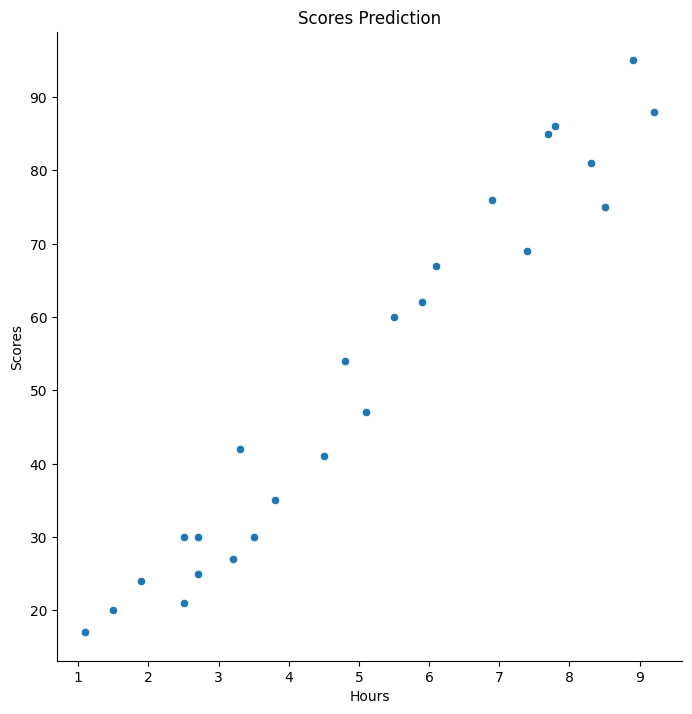

In [8]:
# Visualisasi hubungan antara Hours dan Scores

plt.figure(figsize=(12,6))
sns.pairplot(dataset, x_vars=['Hours'], y_vars=['Scores'], size=7, kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores Prediction')
plt.show()

### Feature Engineering
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

In [9]:
df = dataset.copy()

In [10]:
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [11]:
duplicated_rows= df[df.duplicated(keep=False)]
print(duplicated_rows)

Empty DataFrame
Columns: [Hours, Scores]
Index: []


Kesimpulan:
1. Tidak ada baris yang duplikat dalam DataFrame df.
1. Setiap baris dalam df bersifat unik.

In [12]:
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [13]:
# Check Missing value
df.isna().sum()

,0
Hours,0
Scores,0


Tidak ada missing value

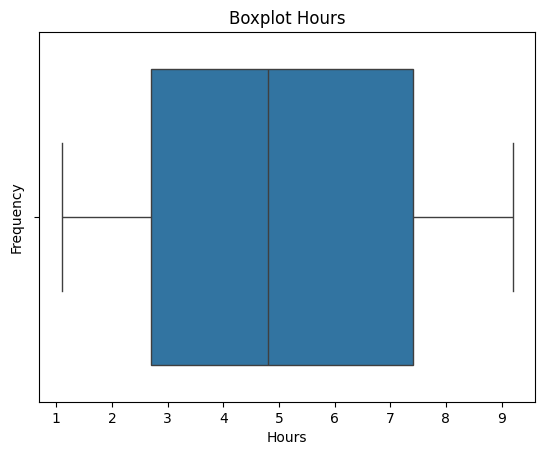

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis outlier
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Boxplot Hours")

# Menampilkan grafik
plt.show()

Tidak ada nilai outlier

## Splitting the data

In [15]:
# Jam belajar
X= df['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [16]:
# Nilai Ujian
y= df['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [17]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [18]:
# Split the data for train and test
# data full -> train, test
# train -> xtrain, ytrain
# test -> xtest, ytest
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.75,random_state=1)
# X_train dan y_train -> knowledge dari dosen ke mahasiswa (X_train contoh soal), y_train (kunci jawaban dari contoh soal)
# X_test dan y_test -> soal2 ujian (UTS maupun UAS) (X_test), y_test (kunci jawaban dosennya / data aktual)

In [19]:
X_train

,Hours
19,7.4
4,3.5
2,3.2
20,2.7
6,9.2
7,5.5
22,3.8
1,5.1
16,2.5
0,2.5


In [20]:
X_test

,Hours
14,1.1
13,3.3
17,1.9
3,8.5
21,4.8
10,7.7
18,6.1


# Linear Regression

In [21]:
# Import linear regression model
from sklearn.linear_model import LinearRegression

In [22]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test= X_test.to_numpy()

# Add new axis to the end
X_train= X_train[:, np.newaxis]
X_test= X_test[:, np.newaxis]

In [23]:
# array
X_train

array([[7.4],
       [3.5],
       [3.2],
       [2.7],
       [9.2],
       [5.5],
       [3.8],
       [5.1],
       [2.5],
       [2.5],
       [8.9],
       [7.8],
       [6.9],
       [2.7],
       [8.3],
       [4.5],
       [5.9],
       [1.5]])

In [24]:
# Array
X_test

array([[1.1],
       [3.3],
       [1.9],
       [8.5],
       [4.8],
       [7.7],
       [6.1]])

In [25]:
y_train

,Scores
19,69
4,30
2,27
20,30
6,88
7,60
22,35
1,47
16,30
0,21


In [26]:
y_test

,Scores
14,17
13,42
17,24
3,75
21,54
10,85
18,67


In [27]:
# Fitting the model using Linear Regression
lr_model= LinearRegression() # Mahasiswa A
lr_model.fit(X_train, y_train) # Mahasiswa belajar

LinearRegression()

In [28]:
y_pred_train= lr_model.predict(X_train)
y_pred_train

array([74.83531868, 34.79320315, 31.71304042, 26.57943587, 93.31629507,
       55.32762137, 37.87336589, 51.22073773, 24.52599405, 24.52599405,
       90.23613234, 78.94220232, 69.70171412, 26.57943587, 84.07580687,
       45.06041226, 59.43450501, 14.25878494])

In [29]:
y_train

,Scores
19,69
4,30
2,27
20,30
6,88
7,60
22,35
1,47
16,30
0,21


In [30]:
# Prediksi score
y_pred= lr_model.predict(X_test) # UTS / UAS
y_pred

array([10.1519013 , 32.73976133, 18.36566858, 86.12924869, 48.14057499,
       77.91548141, 61.48794684])

In [31]:
X_test

array([[1.1],
       [3.3],
       [1.9],
       [8.5],
       [4.8],
       [7.7],
       [6.1]])

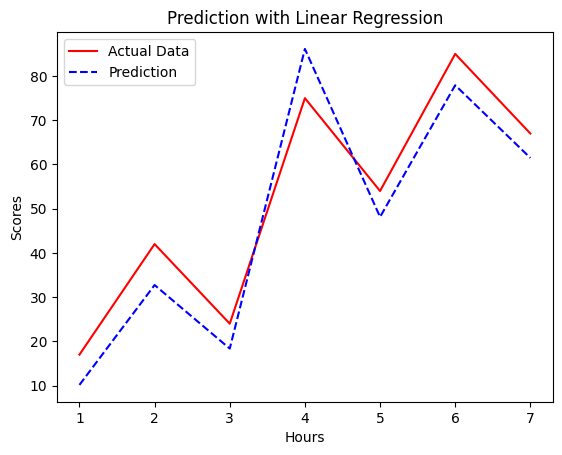

In [32]:
# Visualisasi hubungan antara Hours dan Scores

c= [i for i in range (1, len(y_test)+1,1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual Data')
plt.plot(c, y_pred, color='b', linestyle='dashed', label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

Model ini menunjukkan hubungan linier antara jumlah jam belajar dan skor. Namun, ada beberapa titik yang tidak sesuai dengan garis prediksi, terutama di titik ekstrim.

# Decision Tree Reegressor

In [33]:
from sklearn.tree import DecisionTreeRegressor # mahasiswa B

In [34]:
dt_model= DecisionTreeRegressor() # Mahasiswa belajar
dt_model.fit(X_train, y_train) # Mahasiswa B

DecisionTreeRegressor()

In [35]:
y_pred_dt= dt_model.predict(X_test)
y_pred_dt

array([20., 27., 20., 81., 47., 86., 62.])

In [36]:
y_test

,Scores
14,17
13,42
17,24
3,75
21,54
10,85
18,67


In [37]:
X_test

array([[1.1],
       [3.3],
       [1.9],
       [8.5],
       [4.8],
       [7.7],
       [6.1]])

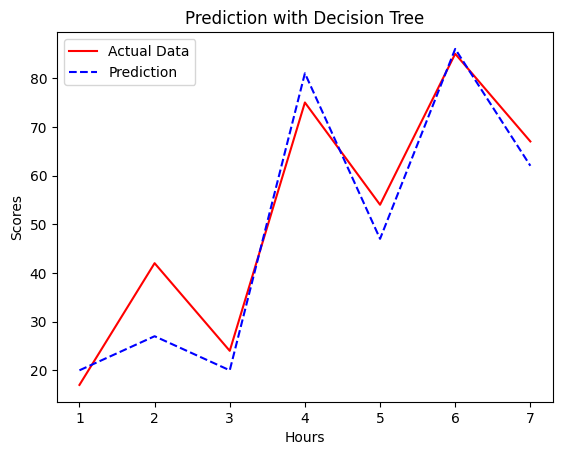

In [38]:
# Visualisasi hubungan antara Hours dan Scores

c= [i for i in range (1, len(y_test)+1,1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual Data')
plt.plot(c, y_pred_dt, color='b', linestyle='dashed', label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.title('Prediction with Decision Tree')
plt.show()

Model ini mampu menangkap pola data dengan lebih akurat dibandingkan Linear Regression. Grafik menunjukkan bahwa prediksi lebih sesuai dengan data aktual, terutama untuk titik-titik yang memiliki perubahan skor drastis.

# Using Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf_model= RandomForestRegressor() # Mahasiswa belajar
rf_model.fit(X_train, y_train) # Mahasiswa C

RandomForestRegressor()

In [41]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([22.988     , 28.27833333, 22.988     , 84.07      , 46.54      ,
       82.07      , 62.6       ])

In [42]:
y_test

,Scores
14,17
13,42
17,24
3,75
21,54
10,85
18,67


In [43]:
X_test

array([[1.1],
       [3.3],
       [1.9],
       [8.5],
       [4.8],
       [7.7],
       [6.1]])

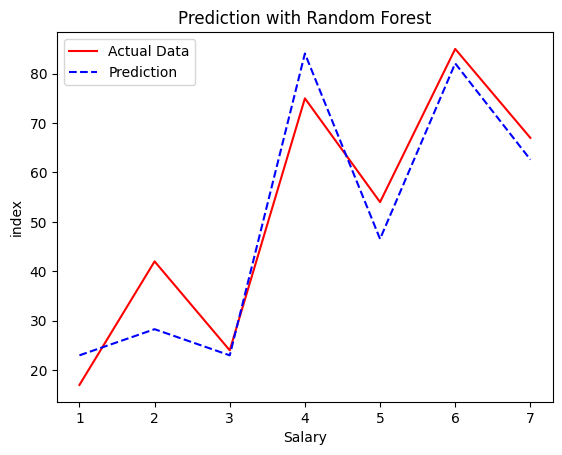

In [44]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_rf,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

Model ini memiliki pola prediksi yang lebih halus dibandingkan Decision Tree, mengurangi overfitting. Namun, tetap mempertahankan akurasi yang baik dalam memprediksi tren data.

# Evaluasi Model

## Regression Evaluation

In [45]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [46]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.8980888932690289


In [47]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: -1.1420287231153239
Coefficient of the line Linear Regression: [10.26720911]


### **Kesimpulan**
- **Model cukup baik** karena \( R^2 = 0.898 \) (89.8% akurasi).
- **Persamaan regresinya adalah:**
  y = -1.142 + 10.267X

- Jika nilai X meningkat 1, nilai y akan meningkat sekitar **10.267**.



## Decision Tree Regressor Evaluation

In [48]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)
print('R square Decision Tree Regressor:',rsq_dt)

R square Decision Tree Regressor: 0.9087462082912032


## Random Forest Evaluation

In [49]:
# Calculate R square vale
rsq_rf = r2_score(y_test, y_pred_rf)
print('R square Random Forest Regressor:', rsq_rf)

R square Random Forest Regressor: 0.9011562628637232


### **Analisis dan Kesimpulan Evaluasi Model**  

Setelah melakukan evaluasi pada tiga model:  
1. **Linear Regression** → \( R^2 = 0.8981 \)  
2. **Decision Tree Regressor** → \( R^2 = 0.9087 \)  
3. **Random Forest Regressor** → \( R^2 = 0.9023 \)  

---

### **Kesimpulan: Model Terbaik**  
**Decision Tree Regressor memiliki R² tertinggi (0.9087), sehingga menjadi model yang terbaik jika hanya dilihat dari R² nya**  
